In [12]:
from parcels import Field, FieldSet, ParticleSet, JITParticle
%matplotlib inline
from matplotlib import pyplot as plt
from glob import glob

# A basic Parcels simulation

In [8]:
environmental_data_path = "/mnt/c/source/phd/environmental_data/february23/"

### Initialise the FieldSet

In [9]:
filenames_current = environmental_data_path + "currents/trondheim_*.nc"
current_files = sorted(glob(filenames_current))

current_filename_map = {"U": current_files,
                        "V": current_files}
current_variables = {"U": "u_eastward",
                     "V": "v_northward" }
current_dimensions = {"lat": "lat",
             "lon": "lon",
             "time": "time"}


fieldset = FieldSet.from_netcdf(filenames=current_filename_map, variables=current_variables, dimensions=current_dimensions)


##### Visualise the FieldSet

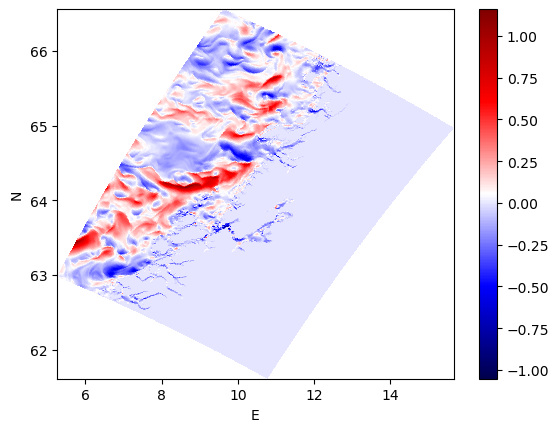

In [11]:
fieldset.computeTimeChunk()

plt.pcolormesh(fieldset.U.grid.lon, fieldset.U.grid.lat, fieldset.U.data[0,:,:], cmap="seismic")
plt.xlabel("E")
plt.ylabel("N")
plt.colorbar()
plt.show()


#### Add wave data to FieldSet

In [27]:
filenames_wave = environmental_data_path + "waves/trondheim_*.nc"
wave_files = sorted(glob(filenames_wave))

wave_dimensions = {"lon": "longitude",
                   "lat": "latitude",
                  "time": "time"}

# Significant wave height Field
hs_variable = {"Wave_Hs": "hs"}
Hs_field = Field.from_netcdf(filenames=wave_files, variable=hs_variable, dimensions=wave_dimensions)


# Wave period Field
t_variable = {"Wave_T": "tp"}
T_field = Field.from_netcdf(filenames=wave_files, variable=t_variable, dimensions=wave_dimensions)


In [28]:
# Add the new Fields to the FieldSet
fieldset.add_field(Hs_field)
fieldset.add_field(T_field)

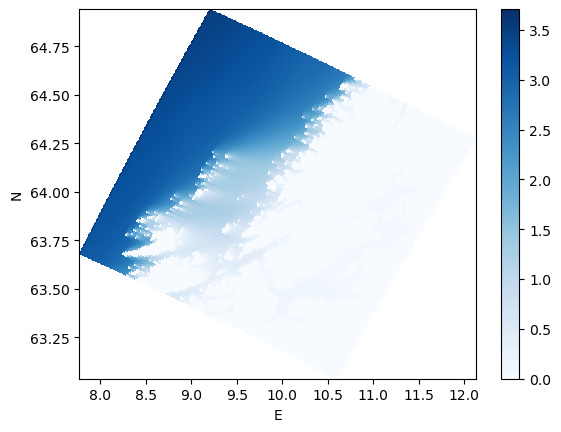

In [31]:
# Verify that it worked by visualising some of the wave data in the field
fieldset.computeTimeChunk()
plt.pcolormesh(fieldset.Wave_Hs.grid.lon, fieldset.Wave_Hs.grid.lat, fieldset.Wave_Hs.data[0,:,:], cmap="Blues")
plt.xlabel("E")
plt.ylabel("N")
plt.colorbar()
plt.show()